In [1]:
import umap
import umap.plot
import pandas as pd
import numpy as np

In [131]:
reducer = umap.UMAP(n_components=20)

In [40]:
data = ['Dataset/wafer_TRAIN', 'Dataset/wafer_TEST']
full_train_data = pd.read_csv(data[0], header = None)
full_test_data = pd.read_csv(data[1], header = None)

test_dataset = full_train_data.iloc[:,range(1,full_train_data.shape[1])] #traindatawithoutlabel
label_test = full_train_data.iloc[:,0] #trainlabel

train_dataset = full_test_data.iloc[:,range(1,full_test_data.shape[1])] #testdatawithoutlabel
label_train = full_test_data.iloc[:,0] #testlabel

train_dataset = train_dataset.values
label_train = label_train.values

test_dataset=test_dataset.values
label_test=label_test.values

# train_dataset[0]

In [133]:
train_embedding = reducer.fit_transform(test_dataset)
# embedding.shape


In [134]:
test_embedding = reducer.fit_transform(train_dataset)
# embedding.shape

In [47]:
x = np.copy(test_dataset)
count = 100
for i in train_dataset:
#     print(i)
    x = np.r_[x,[i]]
print(x.shape)
y = np.copy(label_train)
for i in label_test:
    y = np.r_[y,[i]]
print(y.shape)

x = x[1:251]
y = y[1:251]
print(x.shape,y.shape)

(1162, 82)
(1162,)
(250, 82) (250,)


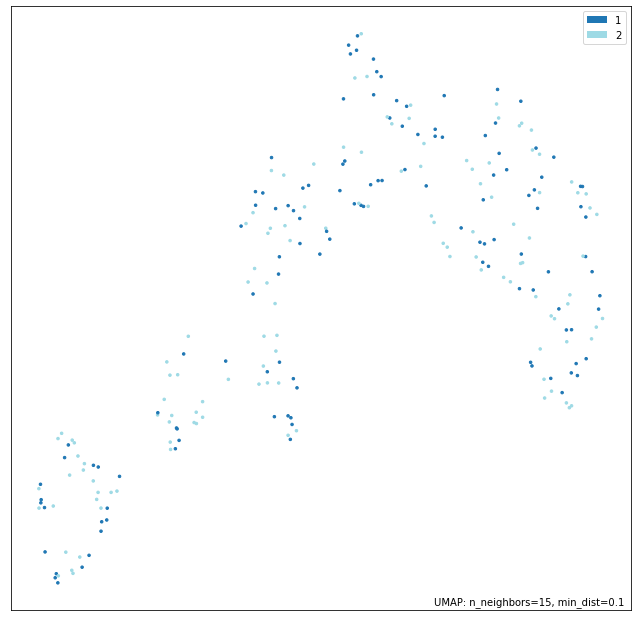

In [48]:
# X,y = np.add(train_dataset,test_dataset),np.add(label_train,label_test)

mapper = umap.UMAP().fit(x)
umap.plot.points(mapper, labels = y, theme='blue')

In [22]:
X_train = train_embedding
y_train = label_test
X_test = test_embedding
y_test = label_train

NameError: name 'train_embedding' is not defined

In [136]:
print(train_embedding.shape,label_train.shape, test_embedding.shape, label_test.shape)

(36, 20) (130,) (130, 20) (36,)


In [137]:
dot1_y = X_test[1]
dot2_y = X_test[2]
dot1_x = list(range(21))
dot2_x = list(range(21))
dot1_x.remove(0)
dot2_x.remove(0)
x, y = [], []
x.append(dot1_x)
x.append(dot2_x)
y.append(dot1_y)
y.append(dot2_y)

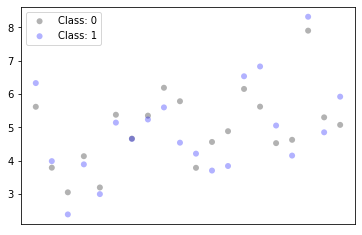

In [138]:
import matplotlib.pyplot as plt
# plt.rcParams['figure.facecolor'] = 'white'
fig, ax = plt.subplots()
# fig.patch.set_facecolor('white')
i=0
for color in ['black', 'blue']:
    n = 750
    x1, y1 = x[i],y[i]
    
#     scale = 200.0 * np.random.rand(n)
    ax.scatter(x1, y1, c=color,  label='Class: '+str(i),
               alpha=0.3, edgecolors='none')
    i+=1

ax.legend()
ax.get_xaxis().set_visible(False)

# ax.grid(True)

plt.show()

In [139]:
import seaborn as sns; #sns.set()
# sns.set_style("dark")

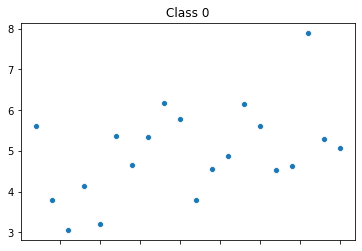

In [143]:
ax = sns.scatterplot(x=dot1_x, y=dot1_y)
ax.set(xticklabels=[])
ax.set(xlabel=None)
ax.set_title('Class 0')
plt.show()

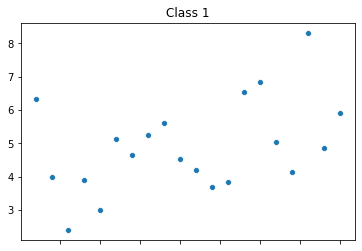

In [142]:
ax = sns.scatterplot(x=dot2_x, y=dot2_y)
ax.set(xticklabels=[])
ax.set(xlabel=None)
ax.set_title('Class 1')
plt.show()

In [144]:
from sklearn import svm
from sklearn import metrics

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.13076923076923078


In [145]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8153846153846154


C:\Users\grohi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [146]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4)
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.18461538461538463
